# Fetal Health Classification
Classify the health of a fetus as Normal, Suspect or Pathological using CTG data

METRO COLLEGE OF TECHNOLOGY

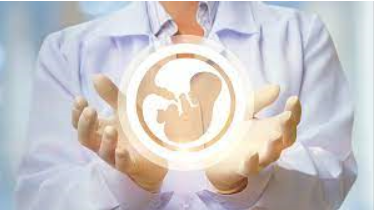

# Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

# Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal - 1
Suspect - 2
Pathological - 3

In [105]:
# import the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [106]:
# import the data
df = pd.read_csv('data/fetal_health.csv')
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [107]:
#Transpose index and columns. Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. 
df.T

0        1        2     \
baseline value                                      120.0  132.000  133.000   
accelerations                                         0.0    0.006    0.003   
fetal_movement                                        0.0    0.000    0.000   
uterine_contractions                                  0.0    0.006    0.008   
light_decelerations                                   0.0    0.003    0.003   
severe_decelerations                                  0.0    0.000    0.000   
prolongued_decelerations                              0.0    0.000    0.000   
abnormal_short_term_variability                      73.0   17.000   16.000   
mean_value_of_short_term_variability                  0.5    2.100    2.100   
percentage_of_time_with_abnormal_long_term_vari...   43.0    0.000    0.000   
mean_value_of_long_term_variability                   2.4   10.400   13.400   
histogram_width                                      64.0  130.000  130.000   
histogram_min                                        62.0   68.000   68.000   
histogram_max                                       126.0  198.000  198.000   
histogram_number_of_peaks                             2.0    6.000    5.000   
histogram_number_of_zeroes                            0.0    1.000    1.000   
histogram_mode                                      120.0  141.000  141.000   
histogram_mean                                      137.0  136.000  135.000   
histogram_median                                    121.0  140.000  138.000   
histogram_variance                                   73.0   12.000   13.000   
histogram_tendency                                    1.0    0.000    0.000   
fetal_health                                          2.0    1.000    1.000   

                                                       3        4        5     \
baseline value                                      134.000  132.000  134.000   
accelerations                                         0.003    0.007    0.001   
fetal_movement                                        0.000    0.000    0.000   
uterine_contractions                                  0.008    0.008    0.010   
light_decelerations                                   0.003    0.000    0.009   
severe_decelerations                                  0.000    0.000    0.000   
prolongued_decelerations                              0.000    0.000    0.002   
abnormal_short_term_variability                      16.000   16.000   26.000   
mean_value_of_short_term_variability                  2.400    2.400    5.900   
percentage_of_time_with_abnormal_long_term_vari...    0.000    0.000    0.000   
mean_value_of_long_term_variability                  23.000   19.900    0.000   
histogram_width                                     117.000  117.000  150.000   
histogram_min                                        53.000   53.000   50.000   
histogram_max                                       170.000  170.000  200.000   
histogram_number_of_peaks                            11.000    9.000    5.000   
histogram_number_of_zeroes                            0.000    0.000    3.000   
histogram_mode                                      137.000  137.000   76.000   
histogram_mean                                      134.000  136.000  107.000   
histogram_median                                    137.000  138.000  107.000   
histogram_variance                                   13.000   11.000  170.000   
histogram_tendency                                    1.000    1.000    0.000   
fetal_health                                          1.000    1.000    3.000   

                                                       6      7        8     \
baseline value                                      134.000  122.0  122.000   
accelerations                                         0.001    0.0    0.000   
fetal_movement                                        0.000    0.0    0.000   
uterine_contractions                                  0

In [108]:
df.shape #showing number of rows and columns. 2126 rows and 22 columns

(2126, 22)

In [109]:
df.info() # Checking the data type of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Checking Missing Values

In [110]:
columns=df.columns
columns_new=[]
for i in columns:
    columns_new.append(any(df[i].isnull()|df[i].isnull()))
df=df.drop(columns[columns_new],axis=1)
#No missing values

In [111]:
#calculating statistical data like percentile, mean and std of the numerical values 
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [112]:
#check for missing values, and dataset damages.
print('Existence of null values: ',df.isnull().values.any())
print('Existence of NaN values: ',df.isna().values.any())

Existence of null values:  False
Existence of NaN values:  False


# Distribution of dependent variable

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

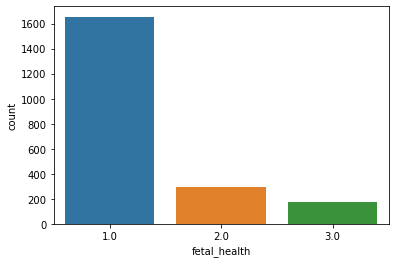

In [113]:
ax = sns.countplot(df.fetal_health,label="Count") 
df.fetal_health.value_counts() # checking the count of dependent variable

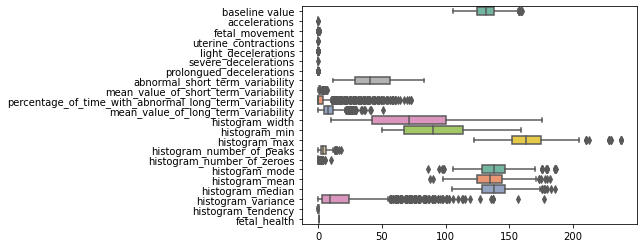

In [114]:
ax = sns.boxplot( palette="Set2", orient="h",data=df[df.fetal_health==1])
#box plot showing normal health data

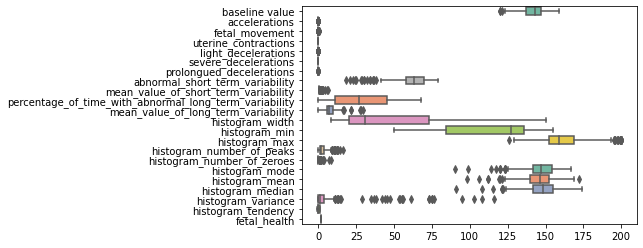

In [115]:
ax = sns.boxplot( palette="Set2", orient="h",data=df[df.fetal_health==2])
#box plot showing Suspect health data

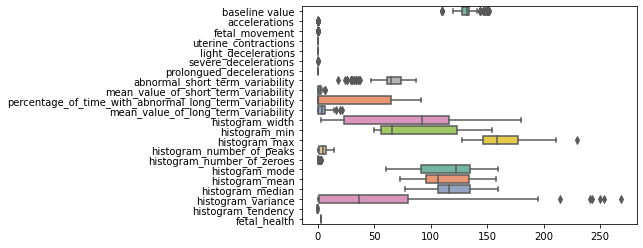

In [116]:
ax = sns.boxplot( palette="Set2", orient="h",data=df[df.fetal_health==3])
##box plot showing pathological health data

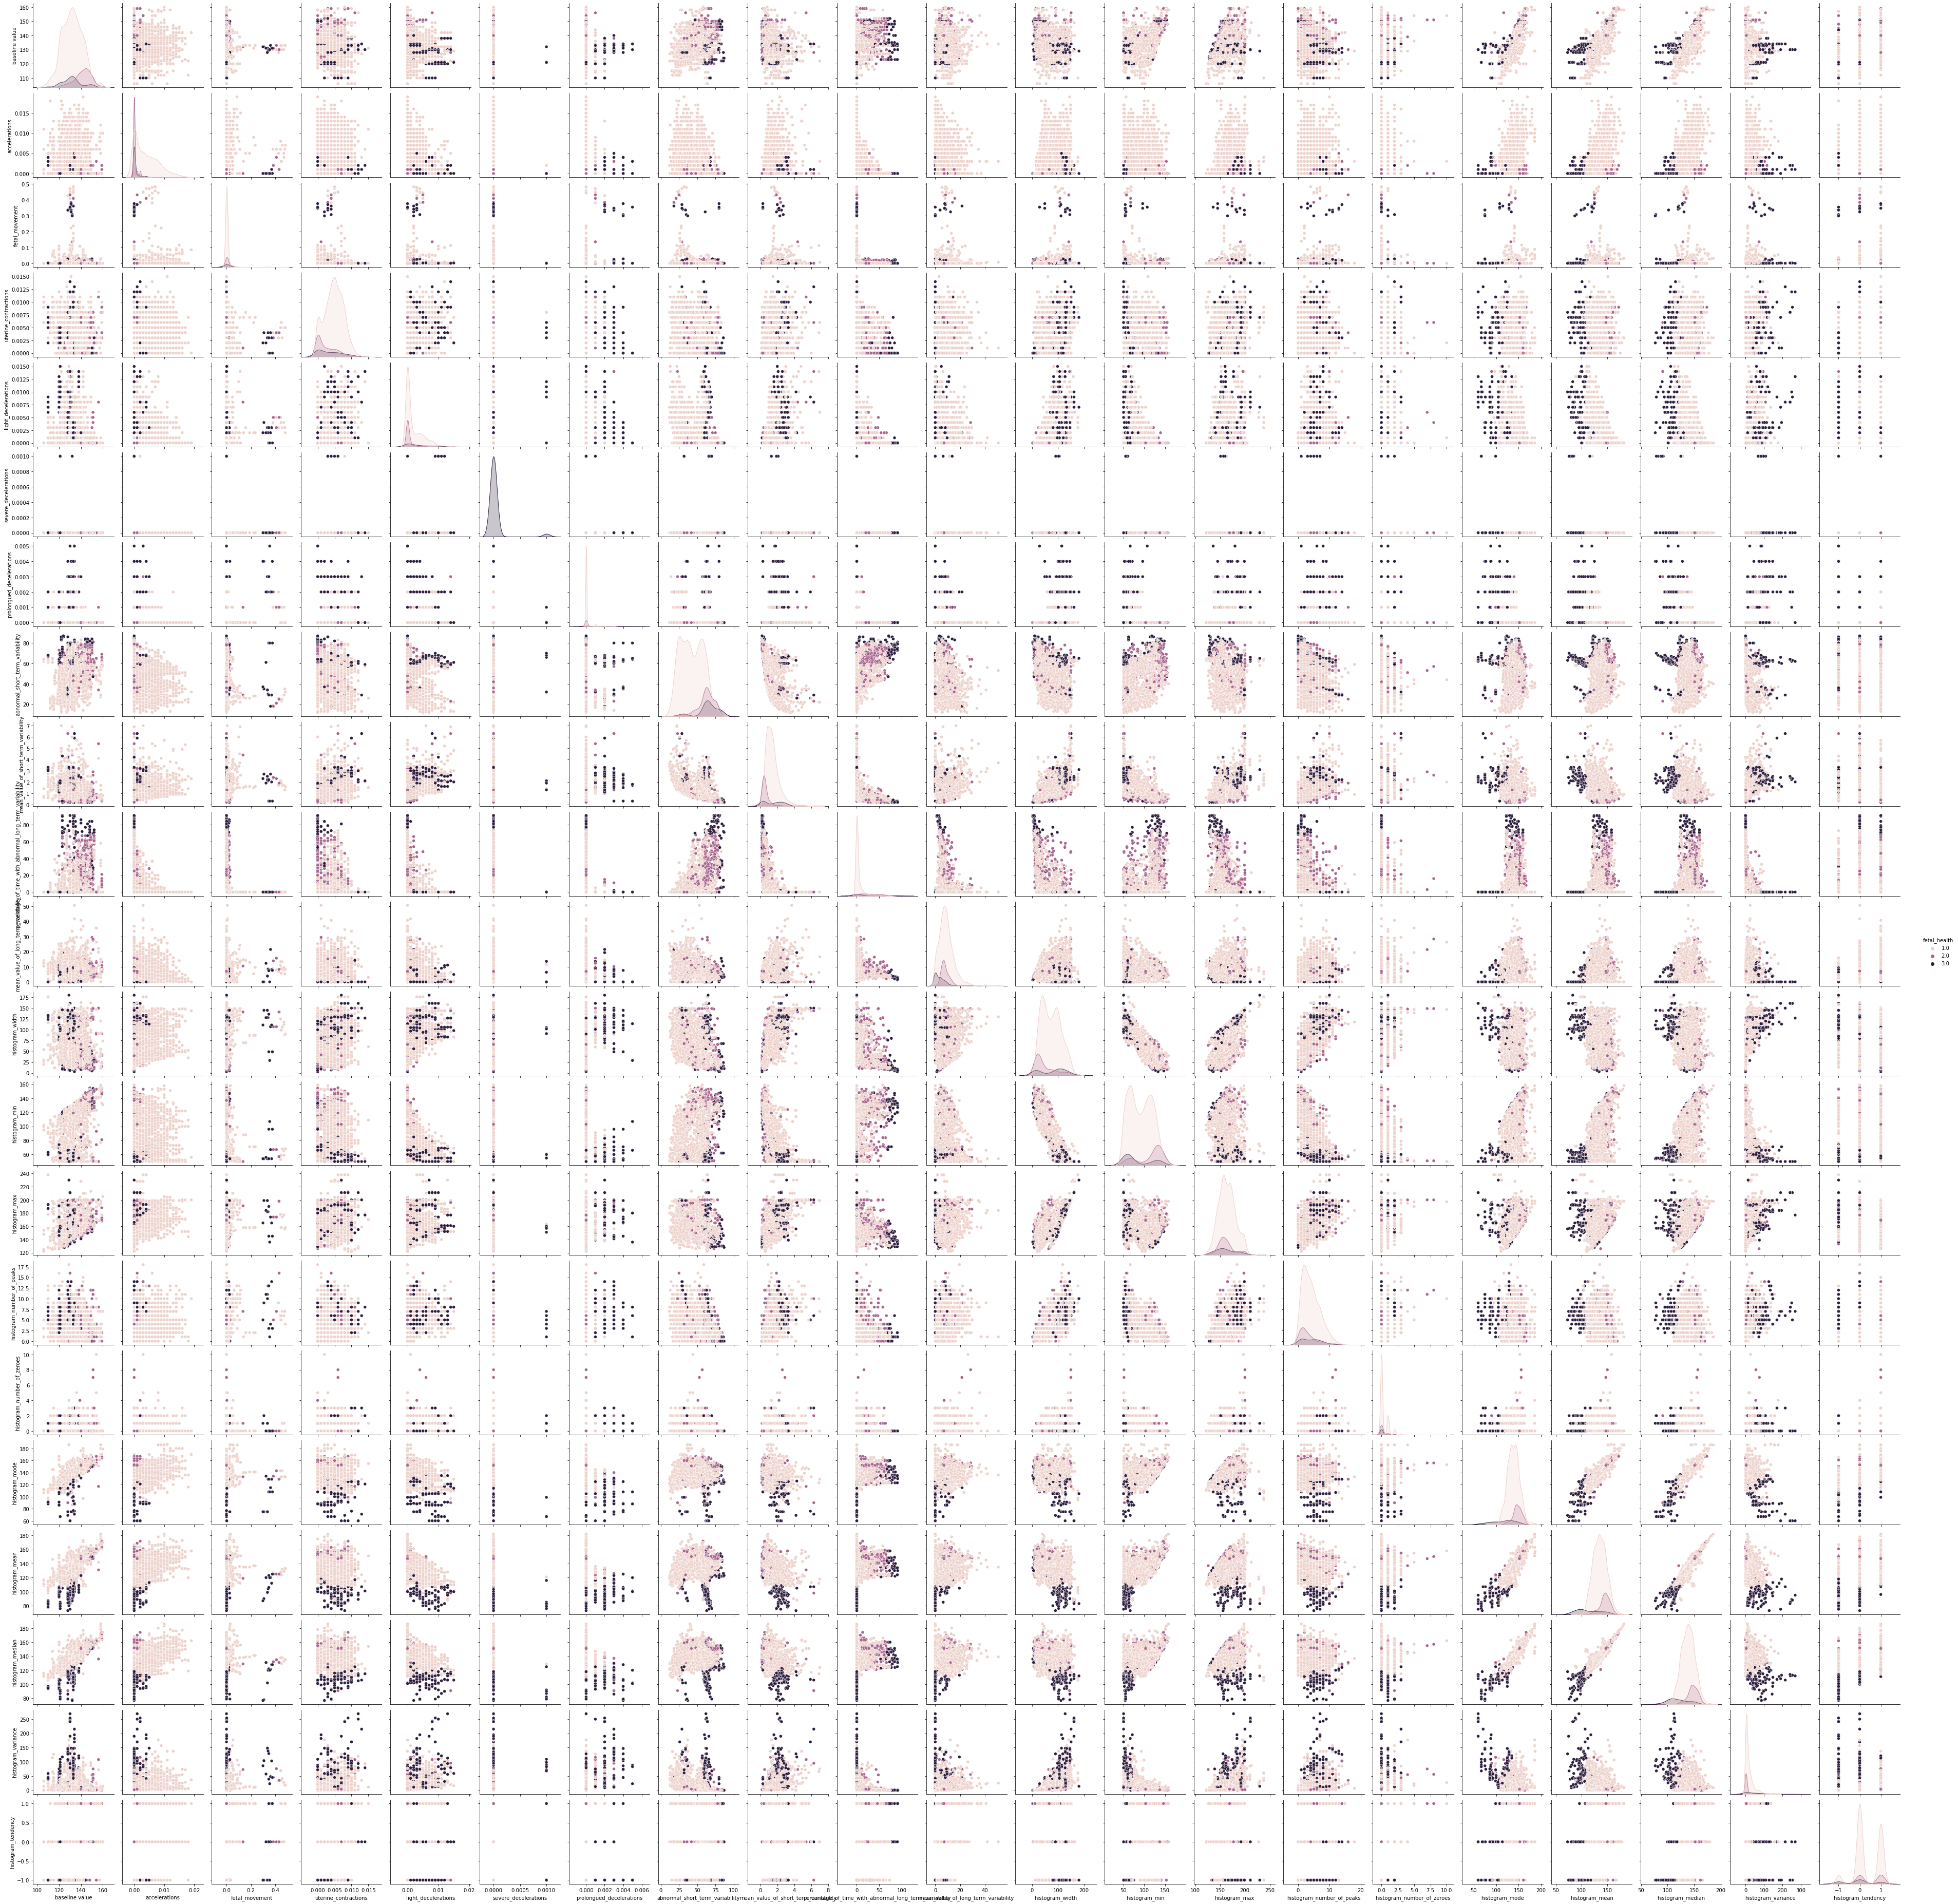

In [117]:
sns.pairplot(df, hue="fetal_health")

In [118]:
#shuffle the dataset for proper sampling
df.sample(frac = 1, random_state=1)

baseline value  accelerations  fetal_movement  uterine_contractions  \
669            141.0          0.001           0.000                 0.001   
1205           143.0          0.000           0.000                 0.006   
870            136.0          0.008           0.000                 0.007   
547            138.0          0.000           0.029                 0.005   
1806           143.0          0.000           0.000                 0.001   
...              ...            ...             ...                   ...   
960            133.0          0.000           0.000                 0.006   
905            146.0          0.000           0.000                 0.007   
1096           123.0          0.017           0.000                 0.002   
235            121.0          0.003           0.006                 0.000   
1061           127.0          0.004           0.000                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
669                 0.003                   0.0                       0.0   
1205                0.000                   0.0                       0.0   
870                 0.000                   0.0                       0.0   
547                 0.002                   0.0                       0.0   
1806                0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
960                 0.009                   0.0                       0.0   
905                 0.005                   0.0                       0.0   
1096                0.000                   0.0                       0.0   
235                 0.000                   0.0                       0.0   
1061                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
669                              54.0                                   0.9   
1205                             63.0                                   0.5   
870                              42.0                                   0.7   
547                              59.0                                   0.5   
1806                             68.0                                   0.3   
...                               ...                                   ...   
960                              20.0                                   2.7   
905                              30.0                                   1.1   
1096                             24.0                                   2.2   
235                              56.0                                   0.6   
1061                             32.0                                   1.0   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
669                                                 7.0       ...   
1205                                               35.0       ...   
870                                                20.0       ...   
547                                                26.0       ...   
1806                                                6.0       ...   
...                                                 ...       ...   
960                                                 0.0       ...   
905                                                 0.0       ...   
1096                                                0.0       ...   
235                                                 2.0       ...   
1061                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
669            60.0          184.0                       12.0   
1205          128.0          161.0                        4.0   
870           120.0          158.0                        2.0   
547           100.0          154.0                        5.0   
1806          132.0          159.0                   

# Extract dependent and independent variables

In [119]:
y=df['fetal_health']
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [120]:
y.value_counts()
#showing imbalanced data, will deal this with Oversampling

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [121]:
X=df.drop(['fetal_health'],axis='columns') # getting independent variables in X
X.head() #showing the independent variables and data

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                               43.0       ...   
1                                                0.0       ...   
2                                                0.0       ...   
3                                                0.0       ...   
4                                                0.0       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0             64.0           62.0          126.0                        2.0   
1            130.0           68.0          198.0                        6.0   
2            130.0           68.0          198.0                        5.0   
3            117.0           53.0          170.0                       11.0   
4            117.0           53.0          170.0                        9.0   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                         0.0           120.0           137.0   
1                         1.0           141.0           136.0   
2                         1.0           141.0           135.0   
3                         0.0           137.0           134.0   
4                         0.0           137.0           136.0   

   histogram_median  histogram_variance  histogram_tendency  
0             121.0                73.0                 1.0  
1             140.0                12.0                 0.0  
2             138.0                13.0                 0.0  
3             137.0                13.0                 1.0  
4             138.0                11.0                 1.0  

[5 rows x 21 columns]

# Correlation Matrix & Heatmap

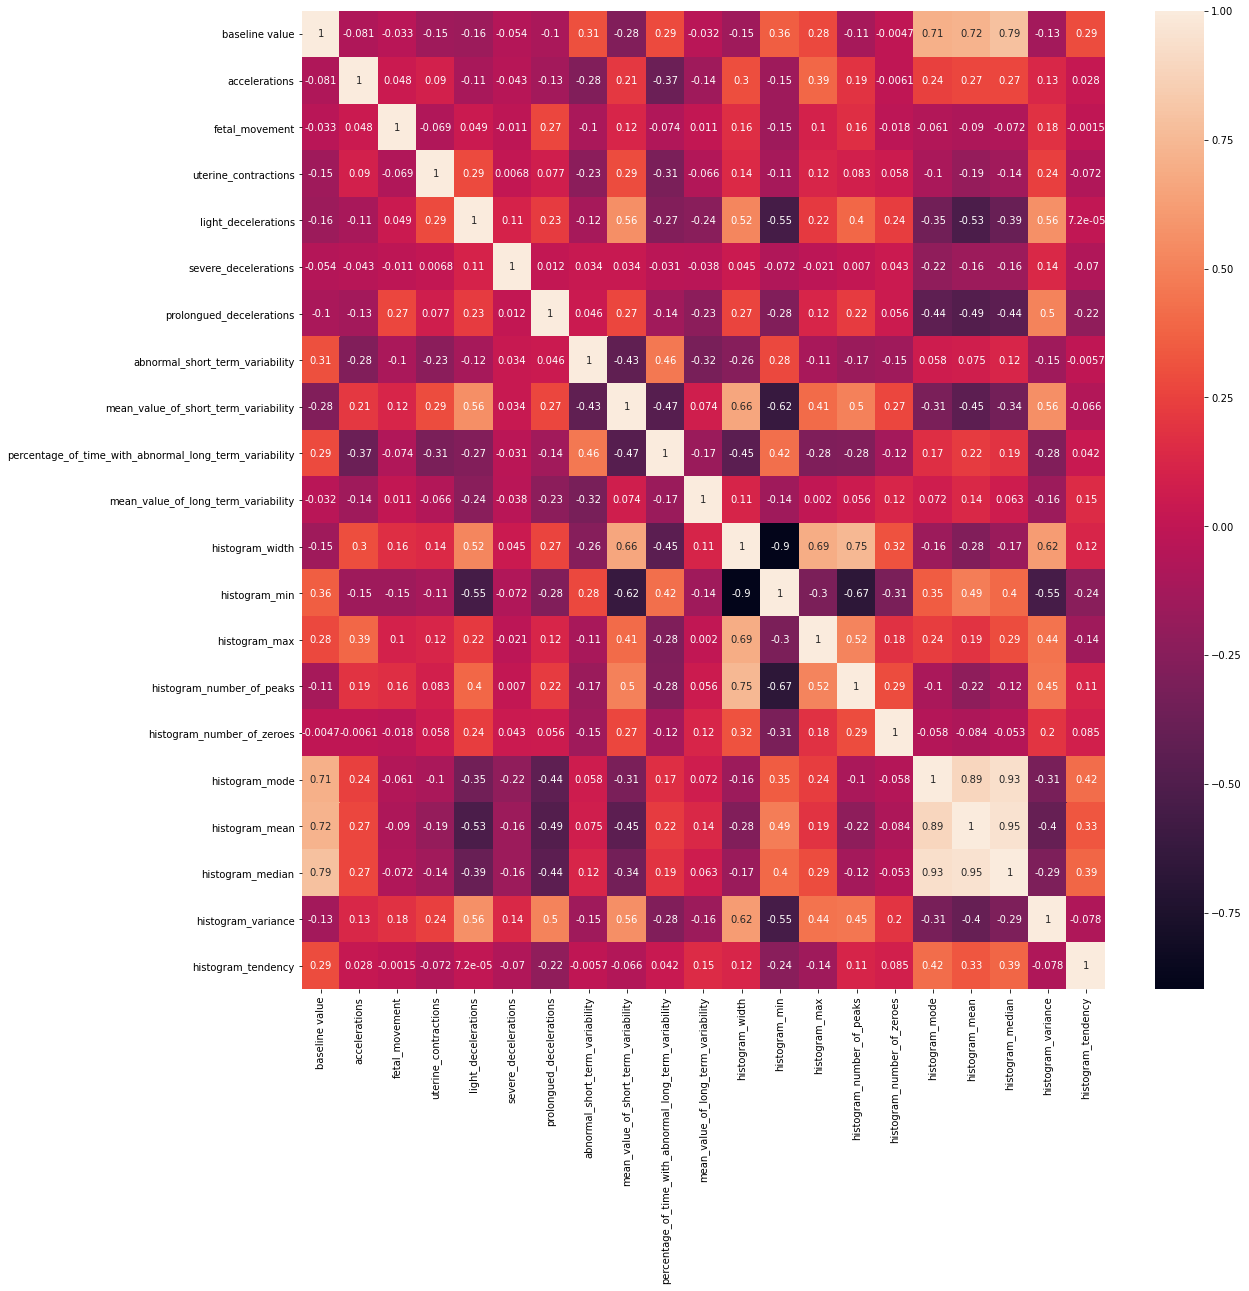

In [122]:
#Correlation Matrix-checking the linear association between the independent variables
#-1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables
corrMatrix = X.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

In [123]:
correlated_features = set()
for i in range(len(corrMatrix .columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.7:
            colname = corrMatrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'histogram_median', 'histogram_mean', 'histogram_min', 'histogram_mode', 'histogram_number_of_peaks'}


# Removing correlated features

In [124]:
X.drop(labels=correlated_features, axis=1, inplace=True) #dropping highly correlated variables

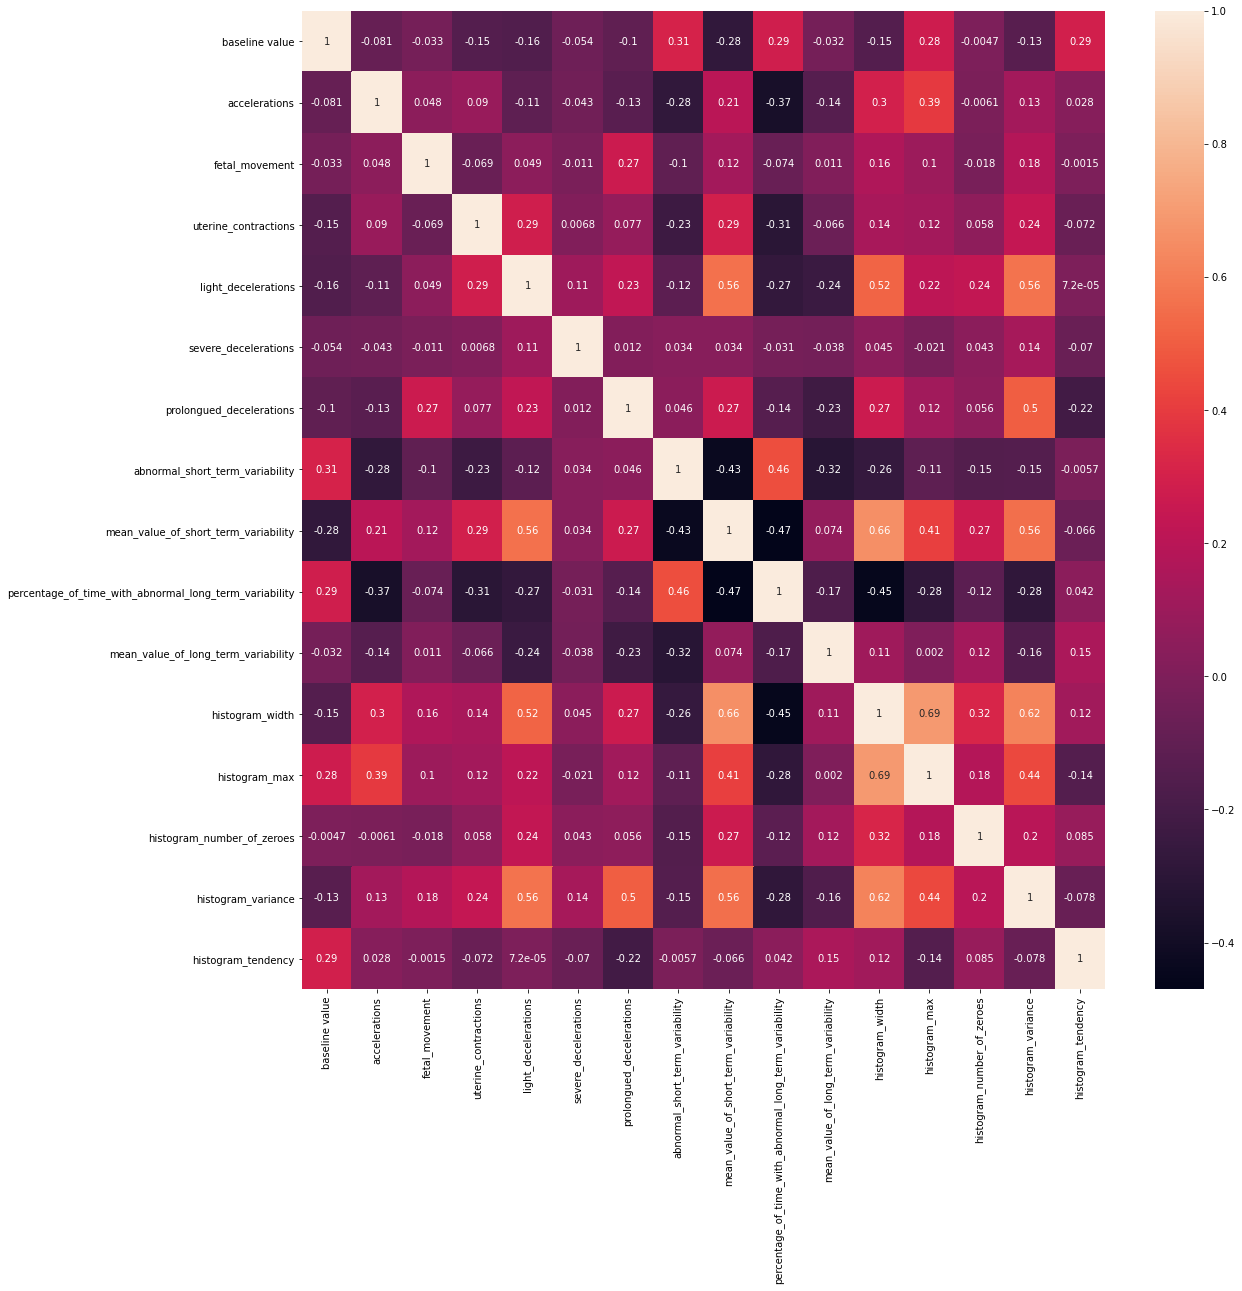

In [125]:
#checking correlation again
corrMatrix = X.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

# Scaling data

In [126]:
#feature scaling as the range of values for different features vary a lot
from sklearn.preprocessing import StandardScaler
mm_scaler = preprocessing.StandardScaler()
X_scaled = pd.DataFrame(mm_scaler.fit_transform(X))
X_scaled.head()

0         1        2         3         4         5         6   \
0 -1.352220 -0.822388 -0.20321 -1.482465 -0.638438 -0.057476 -0.268754   
1 -0.132526  0.730133 -0.20321  0.554627  0.375243 -0.057476 -0.268754   
2 -0.030884 -0.046128 -0.20321  1.233657  0.375243 -0.057476 -0.268754   
3  0.070757 -0.046128 -0.20321  1.233657  0.375243 -0.057476 -0.268754   
4 -0.132526  0.988886 -0.20321  1.233657 -0.638438 -0.057476 -0.268754   

         7         8         9         10        11        12        13  \
0  1.513190 -0.943095  1.802542 -1.028560 -0.165507 -2.119592 -0.458444   
1 -1.744751  0.868841 -0.535361  0.393176  1.529124  1.893794  0.958201   
2 -1.802928  0.868841 -0.535361  0.926327  1.529124  1.893794  0.958201   
3 -1.802928  1.208579 -0.535361  2.632411  1.195333  0.333033 -0.458444   
4 -1.802928  1.208579 -0.535361  2.081488  1.195333  0.333033 -0.458444   

         14        15  
0  1.870569  1.112980  
1 -0.234998 -0.524526  
2 -0.200481 -0.524526  
3 -0.200481  1.112980  
4 -0.269516  1.112980

# Modelling data by splitting to Train and Test

In [127]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.30)
#30% data for test and 70% for train
X_test.head()

0         1         2         3         4         5         6   \
658  -0.335808 -0.563635 -0.203210 -0.124404 -0.638438 -0.057476 -0.268754   
1734  0.070757  1.247640 -0.181776  0.894142  0.713136 -0.057476 -0.268754   
1226 -0.844014 -0.563635 -0.203210 -0.124404 -0.638438 -0.057476 -0.268754   
1808  0.985528 -0.822388 -0.203210 -1.142949 -0.638438 -0.057476 -0.268754   
825   1.900298 -0.822388 -0.203210  0.215111 -0.638438 -0.057476 -0.268754   

            7         8         9         10        11        12        13  \
658  -1.337508 -0.150373  0.117077 -0.104432 -0.910117 -0.503089 -0.458444   
1734  0.698705 -0.150373 -0.535361 -0.530953  0.989924  1.392121 -0.458444   
1226 -0.232135 -0.716603  1.150104 -0.068888 -1.269584 -1.283470 -0.458444   
1808  1.280480 -1.169587 -0.209142  0.215459 -1.115527 -0.280123 -0.458444   
825   0.873237 -1.056341  2.672459 -0.459866 -1.166880 -0.168640 -0.458444   

            14        15  
658  -0.614691 -0.524526  
1734  0.489869 -0.524526  
1226 -0.614691 -0.524526  
1808 -0.614691 -0.524526  
825  -0.614691  1.112980

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 
# showing the row and column count for Test and train data of both dependent and independent variables

((1488, 16), (638, 16), (1488,), (638,))

In [129]:
y_train.value_counts()

1.0    1161
2.0     209
3.0     118
Name: fetal_health, dtype: int64

# Oversampling using SMOTE to treat data imbalance of target variable

In [130]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=2, n=295 (13.876%)
Class=1, n=1655 (77.846%)
Class=3, n=176 (8.278%)


In [131]:
#!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2-': {} \n".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y_train==3)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1-': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '2-': {}".format(sum(y_train_sm==2)))
print("After OverSampling, counts of label '2-': {}".format(sum(y_train_sm==3)))

Before OverSampling, counts of label '1': 1161
Before OverSampling, counts of label '2-': 209 

Before OverSampling, counts of label '3': 118 

After OverSampling, the shape of train_X: (3483, 16)
After OverSampling, the shape of train_y: (3483,) 

After OverSampling, counts of label '1-': 1161
After OverSampling, counts of label '2-': 1161
After OverSampling, counts of label '2-': 1161


In [132]:
#resampled the data to the highest count of the class. will user this resampled data in logistic regression

# Logistic Regression

In [133]:
# train the model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(max_iter=500, tol=0.001)
model.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=500, tol=0.001)

In [134]:
#Test accuracy
model.score(X_test,y_test) # accuracy estimated by model is .85 which is good for predicting data

0.85423197492163

In [135]:
model.score(X_train,y_train) # training score

0.8716397849462365

In [136]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param = {"C":np.logspace(-3,3,7), 
         "penalty":["l1","l2"]}# l1 lasso l2 ridge



lrmodel = GridSearchCV(LogisticRegression(),param,cv=10)
lrmodel.fit(X_train_sm,y_train_sm)

print("tuned hyperparameters :(best parameters) ",lrmodel.best_params_)
print("accuracy :",lrmodel.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8802802753351118


# k-fold cross validation

In [137]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_scaled,y,cv=5).mean()

0.8537188621927644

# Classification Report

In [138]:
#Let's look at some other scores as well
#Predicting the test set data
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       494
         2.0       0.54      0.80      0.64        86
         3.0       0.67      0.81      0.73        58

    accuracy                           0.85       638
   macro avg       0.73      0.83      0.77       638
weighted avg       0.89      0.85      0.86       638



In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [140]:
accuracy_score(y_test,y_pred)

0.85423197492163

# Confusion Matrix
 describing the performance of classification model for which the true values are known

In [141]:
print(confusion_matrix(y_test,y_pred))

[[429  50  15]
 [  9  69   8]
 [  2   9  47]]


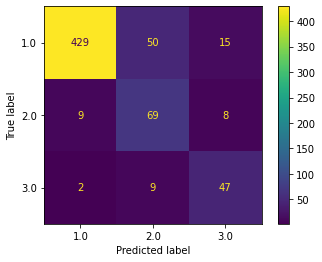

In [142]:
plot_confusion_matrix(model,X_test,y_test)

In [143]:
from sklearn.metrics import roc_auc_score,roc_curve
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9276278145320352

# KNN Model

In [144]:
# K fold score
#see the cross_validated score for cv=5

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=5).mean()
#cross validation score .80 is good enough

0.803848660590997

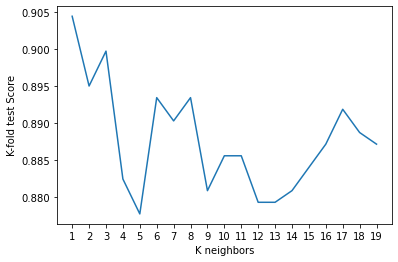

Maximum KNN Score is 90.44%


In [145]:
# try to find best k value
score = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, y_train.values.ravel())
    score.append(knn.score(X_test, y_test.values.ravel()))
    
plt.plot(range(1,20), score)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K neighbors")
plt.ylabel("K-fold test Score")
plt.show()

acc = max(score)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [146]:
knn = KNeighborsClassifier(n_neighbors =1)  # n_neighbors means k
knn.fit(X_train, y_train.values.ravel())  

KNeighborsClassifier(n_neighbors=1)

In [147]:
def conf_matrix(matrix,pred):
    class_names= [0,1]# name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmapuu
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

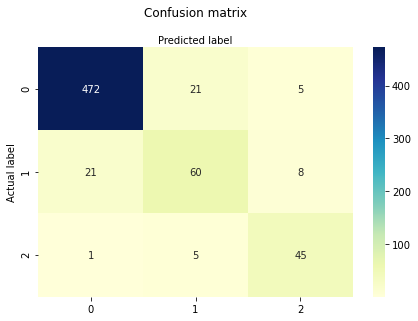

              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       498
         2.0       0.70      0.67      0.69        89
         3.0       0.78      0.88      0.83        51

    accuracy                           0.90       638
   macro avg       0.81      0.83      0.82       638
weighted avg       0.91      0.90      0.90       638



In [148]:
# make class predictions with the model
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

# Hyperparameter Tuning using Gridsearch

In [149]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9],
          'weights':['uniform','distance'],
          'metric':['euclidean','manhattan']}

knnmodel1 = GridSearchCV(
                  KNeighborsClassifier(),
                  params,
                  cv = 4,
                  n_jobs = -1
                 )


knnmodel1.fit(X_train,y_train)
knnmodel1.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [152]:
knnmodel1.score(X_test,y_test) #test score

0.9012539184952978

In [153]:
knnmodel1.score(X_train,y_train) #train score

0.9986559139784946

# AdaBoost Classifier
meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

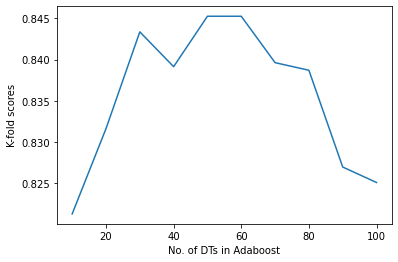

In [34]:
from sklearn.ensemble import AdaBoostClassifier

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=5).mean())
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [35]:
#Hyper parameter tuning using gridsearchcv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,80,90,100],
            'base_estimator': [DecisionTreeClassifier(max_depth=9,random_state=0),
                               DecisionTreeClassifier(max_depth=10,random_state=0),
                               DecisionTreeClassifier(max_depth=11,random_state=0)]
        }
ada_model = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=4)
ada_model.fit(X,y)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=9,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=11,
                                                                   random_state=0)],
                         'n_estimators': [70, 80, 90, 100]})

In [36]:
ada_model.best_params_ #showing the best parameters of the model

{'base_estimator': DecisionTreeClassifier(max_depth=9, random_state=0),
 'n_estimators': 80}

In [37]:
ada_model.best_score_

0.8296765926114722

In [38]:
ada_best_model = ada_model.best_estimator_

In [46]:
ada_best_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [47]:
ada_best_model.score(X_test,y_test) #test score

0.9404388714733543

In [48]:
ada_best_model.score(X_train,y_train) #train score

0.9986559139784946

In [49]:
y_pred = ada_best_model.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       494
         2.0       0.84      0.73      0.78        86
         3.0       0.96      0.90      0.93        58

    accuracy                           0.94       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.94      0.94      0.94       638



# Random Forest Classifier

In [58]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state = 1)
rf.fit(X_train, y_train.values.ravel())
y_pred=rf.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 93.57%


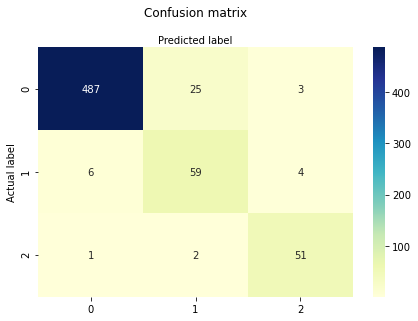

              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       515
         2.0       0.69      0.86      0.76        69
         3.0       0.88      0.94      0.91        54

    accuracy                           0.94       638
   macro avg       0.85      0.92      0.88       638
weighted avg       0.94      0.94      0.94       638



In [59]:
# make class predictions with the model
y_pred = rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

In [60]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=4).mean())

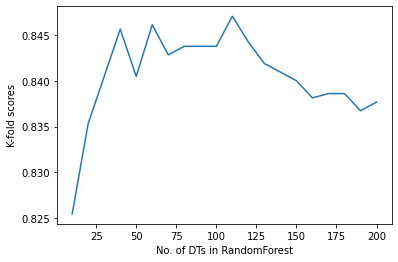

In [61]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [62]:
scores

[0.8254295696869293,
 0.8353236551831557,
 0.8404928281154864,
 0.8456655409710718,
 0.8404945980771137,
 0.8461416606487971,
 0.8428477620605185,
 0.8437876116845786,
 0.8437884966653922,
 0.8437858417229513,
 0.84707974031123,
 0.8442566515157951,
 0.841901717570763,
 0.840961867946703,
 0.8400193633802019,
 0.8381361242088272,
 0.8386095889441116,
 0.8386104739249254,
 0.8367272347535506,
 0.8376688543392379]

In [268]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [80,90,100],
            'max_depth': [12,14,16]
        }
model = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [12, 14, 16],
                         'n_estimators': [80, 90, 100]})

In [269]:
model.best_params_

{'max_depth': 16, 'n_estimators': 100}

In [270]:
model.best_score_

0.8480213598969175

In [271]:
best_model = model.best_estimator_

In [272]:
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, random_state=0)

In [275]:
best_model.score(X_test,y_test) #test score

0.9341692789968652

In [276]:
best_model.score(X_train,y_train) #train score

0.9986559139784946

In [273]:
y_pred = best_model.predict(X_test)

In [274]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       494
         2.0       0.87      0.67      0.76        86
         3.0       0.96      0.86      0.91        58

    accuracy                           0.93       638
   macro avg       0.92      0.84      0.88       638
weighted avg       0.93      0.93      0.93       638



# SVM
linear classifiers which are based on the margin maximization principle. They perform structural risk minimization, which improves the complexity of the classifier with the aim of achieving excellent generalization performance.

In [259]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train.values.ravel())

y_pred=svm.predict(X_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 89.50%


In [260]:
def conf_matrix(matrix,pred):
    class_names= [0,1]# name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmapuu
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

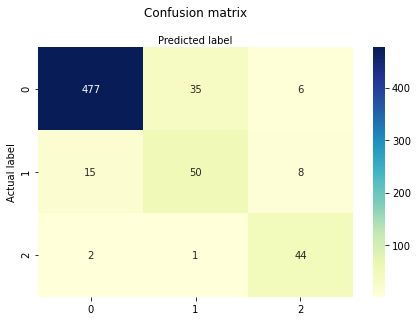

              precision    recall  f1-score   support

         1.0       0.97      0.92      0.94       518
         2.0       0.58      0.68      0.63        73
         3.0       0.76      0.94      0.84        47

    accuracy                           0.89       638
   macro avg       0.77      0.85      0.80       638
weighted avg       0.91      0.89      0.90       638



In [262]:
# make class predictions with the model
y_pred = svm.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
# calculate prediction
report = classification_report(y_pred,y_test)
print(report)

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [249]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'rbf'],
                        'degree': [2,3],
                        'gamma' : [0.1,1,10]
                    }

model = GridSearchCV(SVC(random_state=0),param_grid=params_dictionary,cv=5)

In [250]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [251]:
model.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [252]:
model.best_score_

0.9173457166745758

In [253]:
svm =model.best_estimator_

In [254]:
svm.fit(X_train,y_train)

SVC(C=10, degree=2, gamma=0.1, random_state=0)

In [255]:
svm.score(X_test,y_test) # test score

0.9184952978056427

In [256]:
y_pred = svm.predict(X_test)

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       494
         2.0       0.78      0.69      0.73        86
         3.0       0.94      0.83      0.88        58

    accuracy                           0.92       638
   macro avg       0.88      0.83      0.85       638
weighted avg       0.92      0.92      0.92       638



# Summary & Conclusions

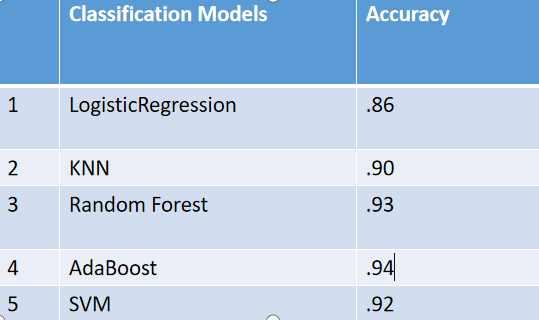